In [1]:
##pandas-分组聚合
# 1. 核心思想：拆分-应用-合并 (Split-Apply-Combine)
import pandas as pd
import numpy as np

data = {
    '城市': ['北京', '上海', '北京', '上海', '广州', '北京', '广州'],
    '日期': pd.to_datetime(['2025-10-01', '2025-10-01', '2025-10-02', '2025-10-03', '2025-10-02', '2025-10-03', '2025-10-03']),
    '品类': ['水果', '蔬菜', '水果', '水果', '蔬菜', '肉类', '水果'],
    '销售额': [100, 150, 120, 200, 90, 300, 110],
    '数量': [10, 15, 12, 20, 9, 25, 11]
}
df = pd.DataFrame(data)

print("原始数据:")
print(df)

原始数据:
   城市         日期  品类  销售额  数量
0  北京 2025-10-01  水果  100  10
1  上海 2025-10-01  蔬菜  150  15
2  北京 2025-10-02  水果  120  12
3  上海 2025-10-03  水果  200  20
4  广州 2025-10-02  蔬菜   90   9
5  北京 2025-10-03  肉类  300  25
6  广州 2025-10-03  水果  110  11


In [2]:
# a) 按单列分组，进行单项聚合
# 这是最基础的用法。例如，我们想计算每个城市的总销售额。

# 拆分: 按“城市”列将数据分成“北京”、“上海”、“广州”三组。

# 应用: 对每组的“销售额”列计算 sum()。

# 合并: 将每个城市的计算结果合并起来。
# 按“城市”分组，然后选择“销售额”列，最后调用 sum() 函数
city_sales = df.groupby('城市')['销售额'].sum()

print("\n每个城市的总销售额:")
print(city_sales)
#常用聚合函数: sum(), mean(), count() (非空值数量), size() (所有行数量), max(), min(), std() (标准差), nunique() (唯一值数量) 等


每个城市的总销售额:
城市
上海    350
北京    520
广州    200
Name: 销售额, dtype: int64


In [5]:
# b) 按多列分组
# 你可以传入一个列表来进行多级分组。例如，计算每个城市、每个品类的平均销售额。
# 按“城市”和“品类”两列进行分组
city_category_sales = df.groupby(['城市', '品类'])['销售额'].mean()
ct = pd.DataFrame(city_category_sales)
print("\n每个城市、每个品类的平均销售额:")
print(ct)


每个城市、每个品类的平均销售额:
         销售额
城市 品类       
上海 水果  200.0
   蔬菜  150.0
北京 水果  110.0
   肉类  300.0
广州 水果  110.0
   蔬菜   90.0


In [6]:
# c) 使用 .agg() 进行多种聚合
# 当你需要同时进行多种聚合运算时，.agg() (aggregate) 方法是你的最佳选择。
# 计算每个城市的销售额总和、平均值和订单数
city_agg = df.groupby('城市')['销售额'].agg(['sum', 'mean', 'count'])

print("\n对每个城市的销售额进行多种聚合:")
print(city_agg)


对每个城市的销售额进行多种聚合:
    sum        mean  count
城市                        
上海  350  175.000000      2
北京  520  173.333333      3
广州  200  100.000000      2


In [7]:
# 2. 对不同列进行不同聚合（最常用、最强大的用法）：
# 你可以传递一个字典给 .agg()，为不同的列指定不同的聚合函数。


# 对每个品类：
# - 计算销售额的总和
# - 计算数量的平均值
# - 计算有多少个不同的城市在销售该品类
category_complex_agg = df.groupby('品类').agg(
    总销售额=('销售额', 'sum'),
    平均数量=('数量', 'mean'),
    销售城市数=('城市', 'nunique')
)

print("\n对每个品类进行复杂聚合:")
print(category_complex_agg)


对每个品类进行复杂聚合:
    总销售额   平均数量  销售城市数
品类                    
水果   530  13.25      3
肉类   300  25.00      1
蔬菜   240  12.00      2


In [8]:
## 3. 其他有用的分组操作
# groupby 对象除了聚合，还有其他强大的功能：
# 筛选 (Filtering): .filter() 可以筛选出符合条件的分组。

# 只保留订单数大于等于3的城市数据
df_filtered = df.groupby('城市').filter(lambda group: len(group) >= 3)
print("\n筛选出订单数>=3的城市:\n", df_filtered)
# 转换 (Transformation): .transform() 可以对每个分组进行计算，并将结果广播回原始 DataFrame 的形状。


# 计算每个城市内，每笔销售额与该城市平均销售额的差值
df['与平均销售额的差值'] = df.groupby('城市')['销售额'].transform(lambda x: x - x.mean())
print("\n计算与城市平均销售额的差值:\n", df)


筛选出订单数>=3的城市:
    城市         日期  品类  销售额  数量
0  北京 2025-10-01  水果  100  10
2  北京 2025-10-02  水果  120  12
5  北京 2025-10-03  肉类  300  25

计算与城市平均销售额的差值:
    城市         日期  品类  销售额  数量   与平均销售额的差值
0  北京 2025-10-01  水果  100  10  -73.333333
1  上海 2025-10-01  蔬菜  150  15  -25.000000
2  北京 2025-10-02  水果  120  12  -53.333333
3  上海 2025-10-03  水果  200  20   25.000000
4  广州 2025-10-02  蔬菜   90   9  -10.000000
5  北京 2025-10-03  肉类  300  25  126.666667
6  广州 2025-10-03  水果  110  11   10.000000


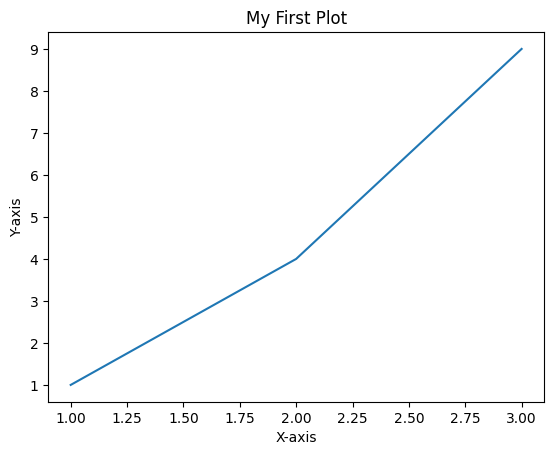

In [10]:
import matplotlib.pyplot as plt

# 1. 创建 Figure 和 Axes 对象
fig, ax = plt.subplots()

# 2. 在指定的 Axes 上绘图
ax.plot([1, 2, 3], [1, 4, 9])

# 3. 调用 Axes 的方法来定制图表
ax.set_title("My First Plot")
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")

plt.show() # 显示图表